In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='potato_leaf_ds.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('potato_leaf_ds.zip')
f.keys()
!unzip potato_leaf_ds.zip

Archive:  potato_leaf_ds.zip
   creating: potato_leaf_ds/
   creating: potato_leaf_ds/train/
   creating: potato_leaf_ds/train/Potato___Early_blight/
  inflating: potato_leaf_ds/train/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG  
  inflating: potato_leaf_ds/train/Potato___Early_blight/02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG  
  inflating: potato_leaf_ds/train/Potato___Early_blight/034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG  
  inflating: potato_leaf_ds/train/Potato___Early_blight/042135e2-e126-4900-9212-d42d900b8125___RS_Early.B 8791.JPG  
  inflating: potato_leaf_ds/train/Potato___Early_blight/0604174e-3018-4faa-9975-0be32d2c0789___RS_Early.B 7123.JPG  
  inflating: potato_leaf_ds/train/Potato___Early_blight/07953ca1-8935-449f-b338-4357ed683b2d___RS_Early.B 6815.JPG  
  inflating: potato_leaf_ds/train/Potato___Early_blight/08029ccc-387e-4be6-9389-04f7b82fdb2a___RS_Early.B 9130.JPG  
  inflating: potato_leaf_ds/tra

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers.serialization import activation
import numpy as np

In [ ]:
train_dir = '/content/potato_leaf_ds/train'
validation_dir = '/content/potato_leaf_ds/validation'
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
no_classes = 3

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 1145 files belonging to 3 classes.
Found 1007 files belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomZoom(height_factor=0.2)
        
    ],
    name="img_augmentation",
)

In [ ]:
class_names = train_dataset.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


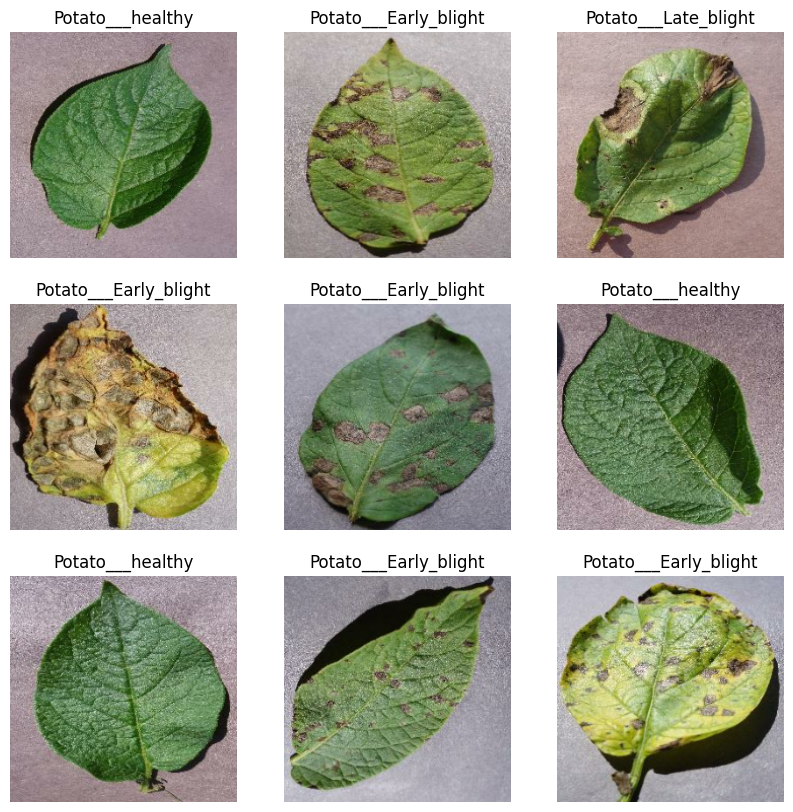

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras import *

In [ ]:
image_size = [224,224]

base_model = keras.applications.ResNet50 (
    weights = "imagenet",
    include_top = False,
    input_shape = (224,224,3),
)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
x=Flatten()(base_model.output)
prediction=Dense(3, activation= 'softmax')(x)
model=Model(inputs=base_model.input, outputs=prediction)
model.summary()
     

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history=model.fit(
    train_dataset,
    epochs=35,
    validation_data=validation_dataset,
)

Epoch 1/35
36/36 [==============================] - 25s 266ms/step - loss: 4.5381 - accuracy: 0.8070 - val_loss: 1.2502 - val_accuracy: 0.9126
Epoch 2/35
36/36 [==============================] - 7s 185ms/step - loss: 0.3266 - accuracy: 0.9712 - val_loss: 0.3088 - val_accuracy: 0.9752
Epoch 3/35
36/36 [==============================] - 7s 187ms/step - loss: 0.1214 - accuracy: 0.9904 - val_loss: 0.2003 - val_accuracy: 0.9772
Epoch 4/35
36/36 [==============================] - 7s 190ms/step - loss: 0.0110 - accuracy: 0.9983 - val_loss: 0.2001 - val_accuracy: 0.9841
Epoch 5/35
36/36 [==============================] - 7s 193ms/step - loss: 0.0015 - accuracy: 0.9991 - val_loss: 0.2129 - val_accuracy: 0.9772
Epoch 6/35
36/36 [==============================] - 8s 201ms/step - loss: 6.2773e-06 - accuracy: 1.0000 - val_loss: 0.2281 - val_accuracy: 0.9762
Epoch 7/35
36/36 [==============================] - 7s 197ms/step - loss: 3.6097e-06 - accuracy: 1.0000 - val_loss: 0.2259 - val_accuracy: 0.97

Accuracy:  1.0


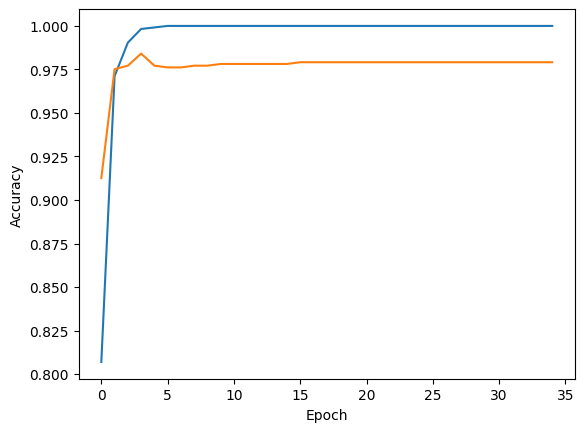

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
print("Accuracy: ",max(history.history['accuracy']))
plt.show()

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8,val_split=0.1, test_split=0.1, shuffle_size=10000, shuffle=True, ) :
  assert (train_split+test_split+val_split) == 1

  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size,seed=12)
  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)
  train_ds = ds. take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)
  return train_ds, val_ds, test_ds

In [ ]:
import tensorflow as tf
dataset = tf. keras.preprocessing. image_dataset_from_directory(
"potato_leaf_ds/train",
shuffle=True,
image_size = (224, 224) ,
batch_size=32
)

Found 1145 files belonging to 3 classes.


In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
train_ds =train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds =train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds =train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)



In [ ]:
class_names = dataset.class_names

First image to predict
Actua1 Label:  Potato___Early_blight
1/1 [==============================] - 0s 45ms/step
Predicted Label:  Potato___Early_blight


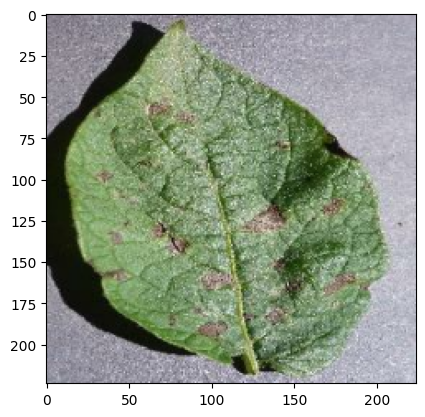

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype("uint8")
  first_label = labels_batch[0].numpy()

  print("First image to predict")
  plt.imshow (first_image)
  print("Actua1 Label: ",class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("Predicted Label: " ,class_names[np.argmax(batch_prediction[0])])